# 네이버 영화 평점 기준, 영화 평점 변화 확인하기

In [1]:
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
from urllib.request import urlopen

url_base = "https://movie.naver.com/"   # 네이버 -> 영화 -> 영화랭킹
url_sub = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20191203"

page = urlopen(url_base+url_sub)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20191203" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [5]:
soup.find_all('div', 'tit5') # class = 'tit5'

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183132" title="교회오빠">교회오빠</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=190244" title="러브 앳">러브 앳</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=63513" title="시간을 달리는 소녀">시간을 달리는 소녀</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=182387" title="윤희에게">윤희에게</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=93005" title="늑대아이">늑대아이</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=155356" title="미쓰백">미쓰백</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154298" title="아이리시맨">아이리시맨</a>
 <

In [6]:
soup.find_all('div', 'tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
</div>

In [7]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>

In [8]:
soup.find_all('div', 'tit5')[0].a.string

'주전장'

In [10]:
soup.find_all('td', 'point')

[<td class="point">9.49</td>,
 <td class="point">9.27</td>,
 <td class="point">9.27</td>,
 <td class="point">9.20</td>,
 <td class="point">9.20</td>,
 <td class="point">9.17</td>,
 <td class="point">9.12</td>,
 <td class="point">9.11</td>,
 <td class="point">9.10</td>,
 <td class="point">8.96</td>,
 <td class="point">8.89</td>,
 <td class="point">8.84</td>,
 <td class="point">8.76</td>,
 <td class="point">8.70</td>,
 <td class="point">8.68</td>,
 <td class="point">8.66</td>,
 <td class="point">8.65</td>,
 <td class="point">8.63</td>,
 <td class="point">8.62</td>,
 <td class="point">8.62</td>,
 <td class="point">8.56</td>,
 <td class="point">8.56</td>,
 <td class="point">8.53</td>,
 <td class="point">8.53</td>,
 <td class="point">8.49</td>,
 <td class="point">8.49</td>,
 <td class="point">8.32</td>,
 <td class="point">8.27</td>,
 <td class="point">8.17</td>,
 <td class="point">8.16</td>,
 <td class="point">8.14</td>,
 <td class="point">8.02</td>,
 <td class="point">7.92</td>,
 <td class

In [11]:
len(soup.find_all('td', 'point'))

48

In [12]:
soup.find_all('td', 'point')[0].string

'9.49'

In [14]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 40)]
movie_name

['주전장',
 '교회오빠',
 '러브 앳',
 '시간을 달리는 소녀',
 '윤희에게',
 '킹 오브 프리즘',
 '킹 오브 프리즘 프라이드 더 히어로',
 '늑대아이',
 '미쓰백',
 '아이리시맨',
 '벌새',
 '여배우는 오늘도',
 '너의 이름은.',
 '접속',
 '썸머 워즈',
 '겨울왕국 2',
 '조커',
 '터미네이터: 다크 페이트',
 '람보 : 라스트 워',
 '닥터 슬립',
 '더 킹: 헨리 5세',
 '블랙머니',
 '족구왕',
 '괴물의 아이',
 '엔젤 해즈 폴른',
 '기생충',
 '메기',
 '해피 엔드',
 '멋진 하루',
 '언어의 정원',
 '좀비랜드: 더블 탭',
 '신의 한 수: 귀수편',
 '별을 쫓는 아이:아가르타의 전설',
 '봉오동 전투',
 '밀양',
 '날씨의 아이',
 '무뢰한',
 '당신의 부탁',
 '아담스 패밀리',
 '나를 찾아줘']

In [15]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, 40)]
movie_point

['9.49',
 '9.27',
 '9.27',
 '9.20',
 '9.20',
 '9.17',
 '9.12',
 '9.11',
 '9.10',
 '8.96',
 '8.89',
 '8.84',
 '8.76',
 '8.70',
 '8.68',
 '8.66',
 '8.65',
 '8.63',
 '8.62',
 '8.62',
 '8.56',
 '8.56',
 '8.53',
 '8.53',
 '8.49',
 '8.49',
 '8.32',
 '8.27',
 '8.17',
 '8.16',
 '8.14',
 '8.02',
 '7.92',
 '7.90',
 '7.87',
 '7.87',
 '7.82',
 '7.81',
 '7.75',
 '7.20']

In [17]:
# date = pd.date_range('2019-8-1', periods=100, freq='D')
date = pd.date_range('2019-10-01', '2019-12-03', freq = 'D')
date

# freq = 'D'
# - 인수로 특정한 날짜만 생성되도록 할 수 있다.
# D = day, S = 초, H = 시간

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12',
               '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16',
               '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20',
               '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
               '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
               '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01',
               '2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05',
               '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
               '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25',
      

In [21]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                        "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])
    

In [22]:
len(movie_date), len(movie_name), len(movie_point)

(2872, 2872, 2872)

In [24]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
# 날짜별로 영화와 포인트가 저장됨

# movie.tail(50) # 가장 최근 날짜 순으로
movie.tail(10)

,date,name,point
2862,2019-12-03,아담스 패밀리,7.75
2863,2019-12-03,나를 찾아줘,7.20
2864,2019-12-03,크롤,7.06
2865,2019-12-03,82년생 김지영,6.69
2866,2019-12-03,삽질,6.50
2867,2019-12-03,대통령의 7시간,6.32
2868,2019-12-03,미래의 미라이,6.05
2869,2019-12-03,얼굴없는 보스,3.49
2870,2019-12-03,행동하는 양심 김대중,2.83
2871,2019-12-03,킹 오브 프리즘 -샤이니 세븐 스타즈-,2.06


In [26]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
# 날짜별로 영화와 포인트가 저장됨

movie.head(10)

,date,name,point
0,2019-10-01,사랑의 선물,9.64
1,2019-10-01,주전장,9.54
2,2019-10-01,안녕 베일리,9.46
3,2019-10-01,알라딘,9.39
4,2019-10-01,폴란드로 간 아이들,9.33
5,2019-10-01,교회오빠,9.28
6,2019-10-01,로마의 휴일,9.22
7,2019-10-01,타샤 튜더,9.04
8,2019-10-01,벌새,8.97
9,2019-10-01,마담 프루스트의 비밀정원,8.91


In [27]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 3 columns):
date     2872 non-null datetime64[ns]
name     2872 non-null object
point    2872 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 67.4+ KB


In [29]:
movie['point'] = movie['point'].astype(float) # astype(): 데이터타입 변경
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 3 columns):
date     2872 non-null datetime64[ns]
name     2872 non-null object
point    2872 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.4+ KB


In [31]:
import numpy as np

# 날짜가 아니라 영화별로 점수의 합산으로 데이터를 보고 싶을 때
# 피벗테이블함수 사용, 내림차순으로

movie_unique = pd.pivot_table(movie, index = ['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
교회오빠,593.50
주전장,589.24
벌새,570.62
조커,549.37
기생충,525.78


In [34]:
tmp = movie.query('name == ["조커"]') # 원하는 영화만 추려서 확인
tmp

,date,name,point
41,2019-10-02,조커,9.27
77,2019-10-03,조커,9.12
113,2019-10-04,조커,9.05
150,2019-10-05,조커,8.98
190,2019-10-06,조커,8.91
...,...,...,...
2649,2019-11-29,조커,8.65
2699,2019-11-30,조커,8.65
2746,2019-12-01,조커,8.65
2792,2019-12-02,조커,8.65


C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


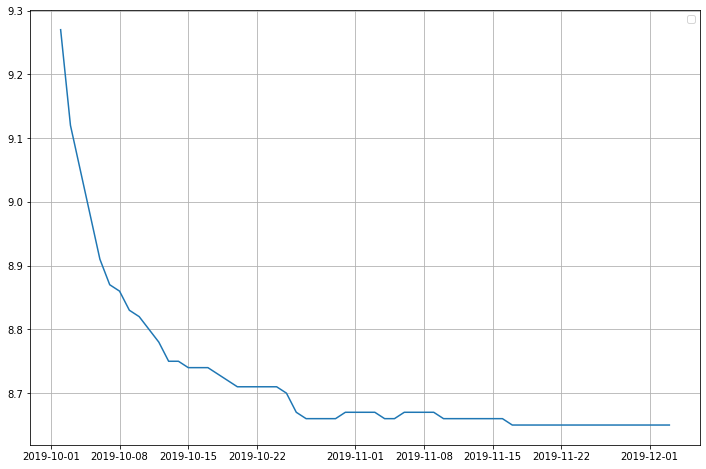

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

# 위의 '조커'의 평점을 날짜별 변화를 확인
plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [38]:
movie_best.head(10)

,point
name,
교회오빠,593.50
주전장,589.24
벌새,570.62
조커,549.37
기생충,525.78
가장 보통의 연애,493.28
메기,445.23
퍼펙트맨,430.10
너의 이름은.,385.25


In [40]:
movie_pivot = pd.pivot_table(movie, index = ["date"], columns = ['name'], values = ['point'])
movie_pivot.head()

point                                                             \
name       47미터 2 80일간의 세계일주 82년생 김지영 가장 보통의 연애 겨울왕국 2  경주 공기인형 괴물의 아이  교회오빠   
date                                                                           
2019-10-01   7.29        NaN      NaN       NaN    NaN NaN  NaN    NaN  9.28   
2019-10-02   7.29        NaN      NaN      8.25    NaN NaN  NaN    NaN  9.28   
2019-10-03   7.29        NaN      NaN      8.36    NaN NaN  NaN    NaN  9.28   
2019-10-04   7.29        NaN      NaN      8.36    NaN NaN  NaN    NaN  9.28   
2019-10-05   7.29        NaN      NaN      8.33    NaN NaN  NaN    NaN  9.28   

                         ...                                              \
name       그것: 두 번째 이야기  ...  퍼스트맨  퍼펙트맨 펄프 픽션 펭귄 하이웨이 폴란드로 간 아이들 프란시스 하   
date                     ...                                               
2019-10-01         6.23  ...   NaN   NaN   NaN     NaN       9.33    NaN   
2019-10-02         6.24  ...  6.96   NaN   NaN     NaN       9.33    NaN   
2019-10-03         6.23  ...   NaN  8.18   NaN     NaN       9.33    NaN   
2019-10-04         6.23  ...   NaN  8.11   NaN     NaN       9.33    NaN   
2019-10-05         6.24  ...   NaN  8.10   NaN     NaN       9.33    NaN   

                                                 
name       해피 엔드 행동하는 양심 김대중 헌터 킬러 힘을 내요, 미스터 리  
date                                             
2019-10-01   NaN         NaN   NaN         7.61  
2019-10-02   NaN         NaN   NaN         7.60  
2019-10-03   NaN         NaN   NaN         7.59  
2019-10-04   NaN         NaN   NaN         7.58  
2019-10-05   NaN         NaN   NaN         7.58  

[5 rows x 157 columns]

In [45]:
movie_df = movie_pivot.to_csv('02-ex3(영화평점결과).csv', encoding= "euckr")

# 엑셀을 열어서 저장된 파일을 확인한다.
print('확인완료')

확인완료


In [46]:
movie_pivot.columns = movie_pivot.columns.droplevel()
# droplevel() = 원하지 않는 컬럼을 삭제

In [47]:
movie_pivot.head()

name,47미터 2,80일간의 세계일주,82년생 김지영,가장 보통의 연애,겨울왕국 2,경주,공기인형,괴물의 아이,교회오빠,그것: 두 번째 이야기,...,퍼스트맨,퍼펙트맨,펄프 픽션,펭귄 하이웨이,폴란드로 간 아이들,프란시스 하,해피 엔드,행동하는 양심 김대중,헌터 킬러,"힘을 내요, 미스터 리"
date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,7.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.28,6.23,...,NaN,NaN,NaN,NaN,9.33,NaN,NaN,NaN,NaN,7.61
2019-10-02,7.29,NaN,NaN,8.25,NaN,NaN,NaN,NaN,9.28,6.24,...,6.96,NaN,NaN,NaN,9.33,NaN,NaN,NaN,NaN,7.60
2019-10-03,7.29,NaN,NaN,8.36,NaN,NaN,NaN,NaN,9.28,6.23,...,NaN,8.18,NaN,NaN,9.33,NaN,NaN,NaN,NaN,7.59
2019-10-04,7.29,NaN,NaN,8.36,NaN,NaN,NaN,NaN,9.28,6.23,...,NaN,8.11,NaN,NaN,9.33,NaN,NaN,NaN,NaN,7.58
2019-10-05,7.29,NaN,NaN,8.33,NaN,NaN,NaN,NaN,9.28,6.24,...,NaN,8.10,NaN,NaN,9.33,NaN,NaN,NaN,NaN,7.58


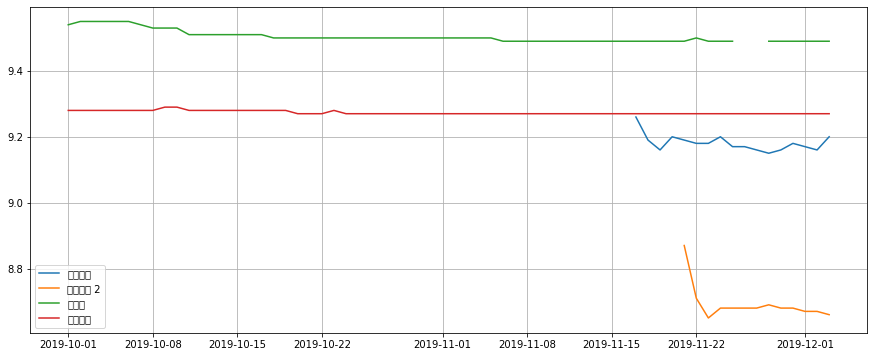

In [50]:
target_col = ['윤희에게', '겨울왕국 2', '주전장', '교회오빠']
plt.figure(figsize=(15,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()